# Distributed Leader Election Data Exploration

In [1]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# A few relevant paths/settings
data_dir = "../data/election"
fot_data_fpath = os.path.join(data_dir, "fitness_over_time.csv")
fdom_data_fpath = os.path.join(data_dir, "final_fitness.csv")

In [4]:
# Load consensus data
con_fot_df = pd.read_csv(fot_data_fpath, dtype={"benchmark":str, "treatment":str, "run_id":str, "update":int, "mean_fitness":float, "max_fitness":float})
con_ff_df = pd.read_csv(fdom_data_fpath)

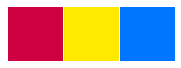

In [8]:
colors = ["#cf0042","#ffe900","#0076ff"]
palette = sns.color_palette(colors)
sns.palplot(palette)

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


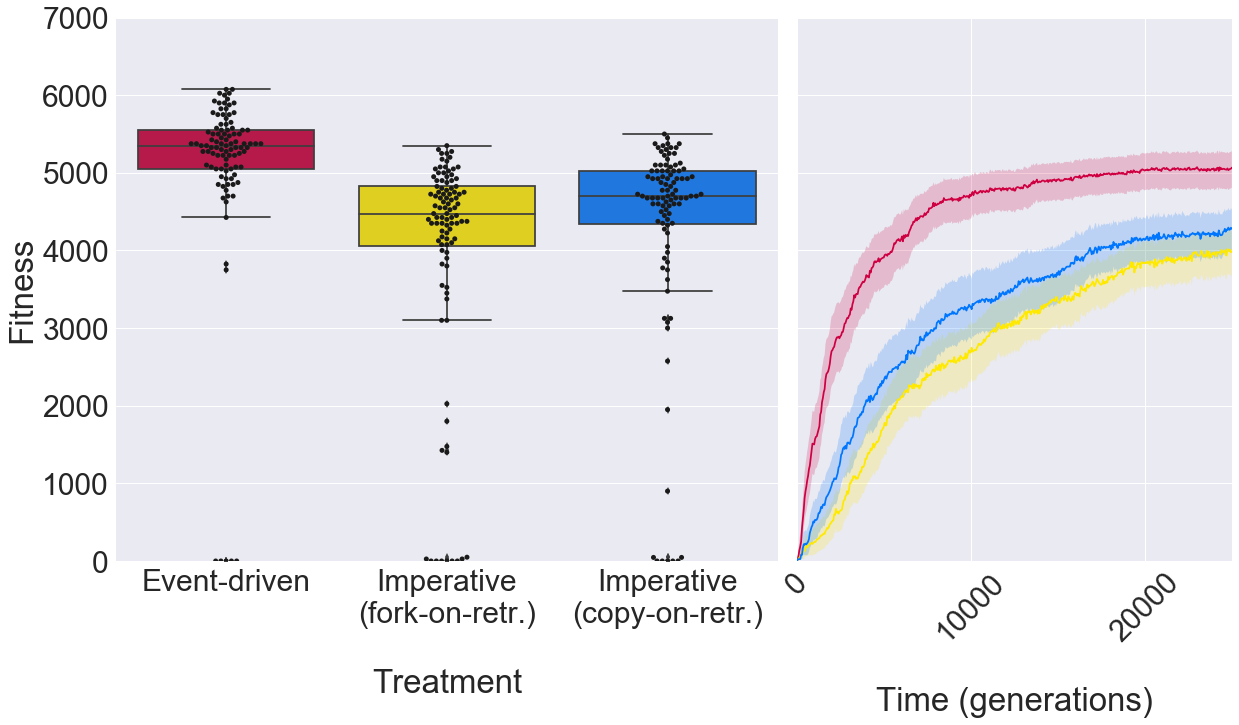

In [9]:
# plot score over time
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(20, 10)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.boxplot(x = "treatment", y = "max_fitness", data = con_ff_df,  orient = "v", ax = ax0, palette=palette)
sns.swarmplot(x="treatment", y="max_fitness", data=con_ff_df, orient="v", ax=ax0, color=".1")
ax0.set_ylabel("Fitness")
ax0.set_xticklabels(["Event-driven", "Imperative\n(fork-on-retr.)", "Imperative\n(copy-on-retr.)"])
ax0.set_xlabel("\nTreatment")
ax0.set_ylim(-2, 7000)


ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=con_fot_df, time="update", unit="run_id", err_style="ci_band",
           condition="treatment", value="max_fitness", ax = ax1, legend = False, ci=95, color=palette)
ax1.set_xlabel("\nTime (generations)")
ax1.set_ylabel("")
ax1.set_xticklabels([i for i in range(0, 50001, 10000)], rotation = 45)
ax1.set_ylim(-2, 7000)
plt.setp(ax1.get_yticklabels(), visible = False)


fig.subplots_adjust(hspace=.3)
fig.savefig("consensus_fitness.png", bbox_inches='tight')